# Get EEG sequence and corresponding image


In [18]:
import torch
from pprint import pprint
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [8]:
root_path = "/home/choi/BrainDecoder"
dataset_path = os.path.join(root_path, "dataset")
images_dataset_path = os.path.join(dataset_path, "imageNet_images")
eeg_dataset_path = os.path.join(dataset_path, "eeg")

fig = plt.figure(figsize=(6, 9))
# fig.tight_layout()

<Figure size 600x900 with 0 Axes>

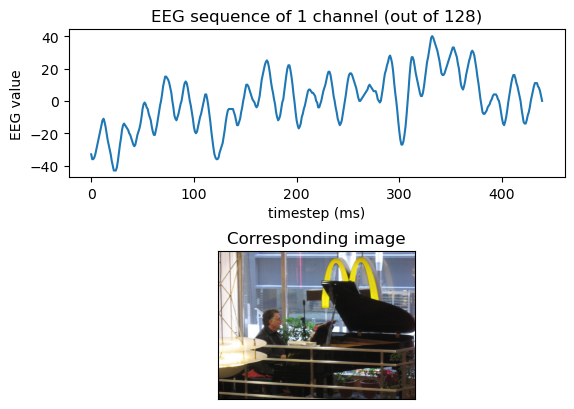

In [19]:
eeg_dataset_name = "eeg_signals_raw_with_mean_std.pth"
eeg_dataset = torch.load(os.path.join(eeg_dataset_path, eeg_dataset_name))

# 128 channels x 500 ms segment
data_idx = 1
eeg_segment = eeg_dataset["dataset"][data_idx]["eeg"]

# narrow down to 1 channel and trim
channel_num = 0
eeg_sequence = eeg_segment[channel_num]
trimmed_eeg_sequence = eeg_sequence[40:480]

# plot sequence
plt.subplot(2, 1, 1)
x = np.arange(440)
y = trimmed_eeg_sequence
plt.plot(x, y)
plt.title("EEG sequence of 1 channel (out of 128)")
plt.xlabel("timestep (ms)")
plt.ylabel("EEG value")
# plt.ylim(-1.5, 1.5)


# get corresponding image
target_class_index = eeg_dataset["dataset"][data_idx]["label"]
target_image_index = eeg_dataset["dataset"][data_idx]["image"]
target_class_name = eeg_dataset["labels"][target_class_index]
target_image_name = eeg_dataset["images"][target_image_index]

image_path = os.path.join(images_dataset_path, target_class_name, target_image_name)
image_path += ".JPEG"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(2, 1, 2)
plt.title("Corresponding image")
plt.xticks([])
plt.yticks([])
plt.imshow(img)


plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5
)
plt.show()

In [20]:
print(eeg_dataset.keys())
# print((eeg_dataset['dataset']))
print((eeg_dataset["dataset"][0]))
print((eeg_dataset["dataset"][0].keys()))
print((eeg_dataset["dataset"][0]["eeg"].size()))
print((eeg_dataset["dataset"][0]["image"]))
print(eeg_dataset["images"][(eeg_dataset["dataset"][0]["image"])])
print((eeg_dataset["dataset"][0]["label"]))
print(eeg_dataset["labels"])
print(len(eeg_dataset["labels"]))

dict_keys(['dataset', 'labels', 'images', 'means', 'stddevs'])
{'eeg': tensor([[    0,     0,     2,  ...,   -37,   -39,   -38],
        [  -12,   -11,    -8,  ...,   -26,   -30,   -33],
        [   35,    29,    21,  ...,   -17,   -12,    -9],
        ...,
        [ -830,  -826,  -838,  ...,  -935,  -956, -1028],
        [ -782,  -848,  -840,  ...,  -951,  -987,  -994],
        [-2656, -2643, -2616,  ..., -2747, -2779, -2786]], dtype=torch.int16), 'image': 0, 'label': 10, 'subject': 4}
dict_keys(['eeg', 'image', 'label', 'subject'])
torch.Size([128, 500])
0
n02951358_31190
10
['n02389026', 'n03888257', 'n03584829', 'n02607072', 'n03297495', 'n03063599', 'n03792782', 'n04086273', 'n02510455', 'n11939491', 'n02951358', 'n02281787', 'n02106662', 'n04120489', 'n03590841', 'n02992529', 'n03445777', 'n03180011', 'n02906734', 'n07873807', 'n03773504', 'n02492035', 'n03982430', 'n03709823', 'n03100240', 'n03376595', 'n03877472', 'n03775071', 'n03272010', 'n04069434', 'n03452741', 'n03792972',

In [27]:
ds = eeg_dataset
print(ds.keys())
print(ds["labels"])
print(len(ds["labels"]))
print(ds["images"])
print(len(ds["images"]))

dict_keys(['dataset', 'labels', 'images', 'means', 'stddevs'])
['n02389026', 'n03888257', 'n03584829', 'n02607072', 'n03297495', 'n03063599', 'n03792782', 'n04086273', 'n02510455', 'n11939491', 'n02951358', 'n02281787', 'n02106662', 'n04120489', 'n03590841', 'n02992529', 'n03445777', 'n03180011', 'n02906734', 'n07873807', 'n03773504', 'n02492035', 'n03982430', 'n03709823', 'n03100240', 'n03376595', 'n03877472', 'n03775071', 'n03272010', 'n04069434', 'n03452741', 'n03792972', 'n07753592', 'n13054560', 'n03197337', 'n02504458', 'n02690373', 'n03272562', 'n04044716', 'n02124075']
40
['n02951358_31190', 'n03452741_16744', 'n04069434_10318', 'n02951358_34807', 'n03452741_5499', 'n03376595_247', 'n02906734_14010', 'n03452741_2982', 'n02607072_5873', 'n02510455_96034', 'n02281787_4182', 'n02906734_508', 'n03272010_4472', 'n04044716_691', 'n03272562_1177', 'n03773504_14125', 'n02607072_3895', 'n03272010_6902', 'n03709823_451', 'n02389026_2743', 'n04044716_8814', 'n03197337_1807', 'n03773504_29

In [35]:
print(ds["dataset"][1])
print(ds["images"][1])
print(ds["labels"][30])

{'eeg': tensor([[ -24,  -27,  -28,  ...,   15,   17,   20],
        [ -26,  -31,  -35,  ...,   25,   27,   31],
        [  23,   29,   34,  ...,  -14,  -16,  -20],
        ...,
        [ 340,  340,  362,  ...,  -74,  -21,   36],
        [ -21,  -20,    8,  ..., -377, -244, -177],
        [ 312,  329,  390,  ...,  -88,   40,  135]], dtype=torch.int16), 'image': 1, 'label': 30, 'subject': 4}
n03452741_16744
n03452741


In [39]:
print(ds["labels"])
for i, label in enumerate(ds["labels"]):
    print(str(i) + ': "' + label + '",')
    print('"' + label + '": ' + str(i) + ",")

['n02389026', 'n03888257', 'n03584829', 'n02607072', 'n03297495', 'n03063599', 'n03792782', 'n04086273', 'n02510455', 'n11939491', 'n02951358', 'n02281787', 'n02106662', 'n04120489', 'n03590841', 'n02992529', 'n03445777', 'n03180011', 'n02906734', 'n07873807', 'n03773504', 'n02492035', 'n03982430', 'n03709823', 'n03100240', 'n03376595', 'n03877472', 'n03775071', 'n03272010', 'n04069434', 'n03452741', 'n03792972', 'n07753592', 'n13054560', 'n03197337', 'n02504458', 'n02690373', 'n03272562', 'n04044716', 'n02124075']
0: "n02389026",
"n02389026": 0,
1: "n03888257",
"n03888257": 1,
2: "n03584829",
"n03584829": 2,
3: "n02607072",
"n02607072": 3,
4: "n03297495",
"n03297495": 4,
5: "n03063599",
"n03063599": 5,
6: "n03792782",
"n03792782": 6,
7: "n04086273",
"n04086273": 7,
8: "n02510455",
"n02510455": 8,
9: "n11939491",
"n11939491": 9,
10: "n02951358",
"n02951358": 10,
11: "n02281787",
"n02281787": 11,
12: "n02106662",
"n02106662": 12,
13: "n04120489",
"n04120489": 13,
14: "n03590841",
"n0359